# 아디다스 판매데이터 분석 프로젝트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import pandas as pd
import numpy as np



adidas = pd.read_csv("/content/drive/MyDrive/metacode_project/Adidas US Sales Datasets.csv", encoding='utf-8')


In [23]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [24]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


## 데이터 타입 변환

- Retailer ID 는 고유한 아이디값이므로 굳이 숫자로 표현할 이유가 없다. >> string 으로 변경

- Invoice Date 날짜 이므로 >> Date 타입으로 변경

- Price per Unit, Units Sold, Total Sales, Operating Profit, Operating Margin 등은 판매량, 판매금약, 영업이익 같은 숫자로 표현되어야 결과값에 도출이 편하므로 >> 모두 float 실수형으로 변경



In [46]:
# 앞에 $ 표시 없애주어야 함

adidas['Price per Unit'].head()

0    $50.00 
1    $50.00 
2    $40.00 
3    $45.00 
4    $60.00 
Name: Price per Unit, dtype: object

In [51]:
import re

adidas['Price per Unit'] = adidas['Price per Unit'].str.replace('[\$,%,]', '',regex=True).astype(float)

adidas['Units Sold'] = adidas['Units Sold'].str.replace('[\$,%,]', '',regex=True).astype(float)

adidas['Total Sales'] = adidas['Total Sales'].str.replace('[\$,%,]', '',regex=True).astype(float)

adidas['Operating Profit'] = adidas['Operating Profit'].str.replace('[\$,%,]', '',regex=True).astype(float)

adidas['Operating Margin'] = adidas['Operating Margin'].str.replace('[\$,%,]', '',regex=True).astype(float)


In [52]:
adidas.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store


- Operating Margin 은 % 였으므로 영업이익을 말하는 수치이기 때문에 0.01을 곱해주어야 한다. 백분율이기 때문


In [53]:
adidas['Operating Profit_rate'] = adidas['Operating Margin'] * 0.01
adidas.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating Profit_rate
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.5
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.3


- 날짜 형태변환

In [54]:
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'], format="%Y-%m-%d")

In [55]:
adidas['year'] = adidas['Invoice Date'].dt.year
adidas['month'] = adidas['Invoice Date'].dt.month

In [57]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Retailer               9648 non-null   object        
 1   Retailer ID            9648 non-null   int64         
 2   Invoice Date           9648 non-null   datetime64[ns]
 3   Region                 9648 non-null   object        
 4   State                  9648 non-null   object        
 5   City                   9648 non-null   object        
 6   Product                9648 non-null   object        
 7   Price per Unit         9648 non-null   float64       
 8   Units Sold             9648 non-null   float64       
 9   Total Sales            9648 non-null   float64       
 10  Operating Profit       9648 non-null   float64       
 11  Operating Margin       9648 non-null   float64       
 12  Sales Method           9648 non-null   object        
 13  Ope

- 문자를 숫자로 변환

In [59]:
adidas['Retailer ID'] = adidas['Retailer ID'].astype('string')

In [60]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Retailer               9648 non-null   object        
 1   Retailer ID            9648 non-null   string        
 2   Invoice Date           9648 non-null   datetime64[ns]
 3   Region                 9648 non-null   object        
 4   State                  9648 non-null   object        
 5   City                   9648 non-null   object        
 6   Product                9648 non-null   object        
 7   Price per Unit         9648 non-null   float64       
 8   Units Sold             9648 non-null   float64       
 9   Total Sales            9648 non-null   float64       
 10  Operating Profit       9648 non-null   float64       
 11  Operating Margin       9648 non-null   float64       
 12  Sales Method           9648 non-null   object        
 13  Ope

- 결측치 처리

In [62]:
adidas.isnull().sum() # 없음

Retailer                 0
Retailer ID              0
Invoice Date             0
Region                   0
State                    0
City                     0
Product                  0
Price per Unit           0
Units Sold               0
Total Sales              0
Operating Profit         0
Operating Margin         0
Sales Method             0
Operating Profit_rate    0
year                     0
month                    0
dtype: int64

# 데이터 분석(1)

## 월별 판매량 분석

In [63]:
adidas.describe()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Operating Profit_rate,year,month
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.282131,42.299129,0.422991,2020.865050,6.458126
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,10.000000,0.100000,2020.000000,1.000000
25%,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1922.000000,35.000000,0.350000,2021.000000,3.000000
50%,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.500000,41.000000,0.410000,2021.000000,6.000000
75%,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52063.000000,49.000000,0.490000,2021.000000,9.000000
max,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,80.000000,0.800000,2021.000000,12.000000
std,NaN,14.705397,214.252030,141916.016727,54193.124141,9.719742,0.097197,0.341688,3.454799


### 월별 판매량 그래프

<Axes: xlabel='year,month'>

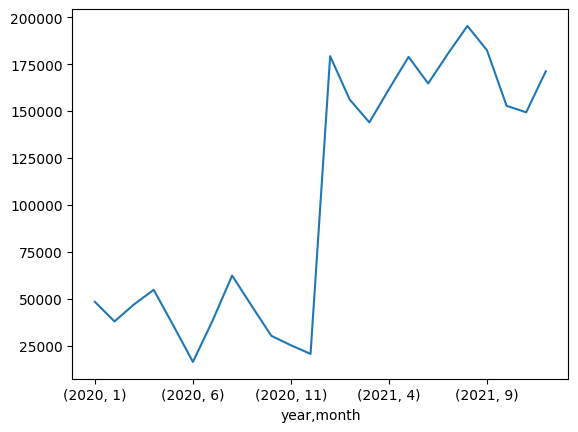

In [65]:
adidas.groupby(['year', 'month'])['Units Sold'].sum().plot.line()

# 2020년 12월과 2021년 1월 사이에 판매량 급증

In [66]:
adidas.groupby(['year', 'month'])['Units Sold'].sum()

year  month
2020  1         48333.0
      2         37846.0
      3         46972.0
      4         54709.0
      5         35705.0
      6         16269.0
      7         38219.0
      8         62307.0
      9         46125.0
      10        30167.0
      11        25152.0
      12        20545.0
2021  1        179299.0
      2        156113.0
      3        143988.0
      4        161717.0
      5        178900.0
      6        164745.0
      7        180481.0
      8        195414.0
      9        182425.0
      10       152834.0
      11       149350.0
      12       171246.0
Name: Units Sold, dtype: float64

In [67]:
adidas.pivot_table(index = 'year', columns = 'month', values = 'Units Sold', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,48333.0,37846.0,46972.0,54709.0,35705.0,16269.0,38219.0,62307.0,46125.0,30167.0,25152.0,20545.0
2021,179299.0,156113.0,143988.0,161717.0,178900.0,164745.0,180481.0,195414.0,182425.0,152834.0,149350.0,171246.0


### 소매업체별 분석

In [68]:
adidas.pivot_table(index = ['year', 'month'] , columns = 'Retailer', values = 'Units Sold', aggfunc='sum')

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

<Axes: xlabel='year,month'>

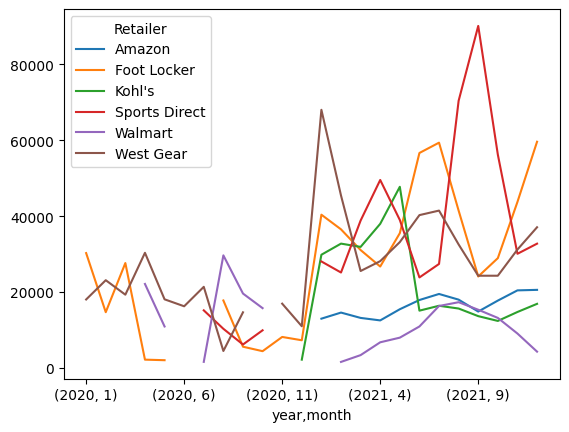

In [70]:
adidas.pivot_table(index = ['year', 'month'] , columns = 'Retailer', values = 'Units Sold', aggfunc='sum').plot.line()

In [71]:
adidas[['Retailer', 'Retailer ID']].drop_duplicates().sort_values('Retailer')
# 소매점 별 매장 개수

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


- 월별로 상점의 개수의 변화를 알아보자
- 판매량이 늘었다는건 상점의 개수가 늘어났을 수도 있기 때문에

In [72]:
df = adidas[['Retailer', 'Retailer ID', 'year', 'month']].drop_duplicates().sort_values(['Retailer', 'Retailer ID', 'year', 'month'])

In [73]:
df

,Retailer,Retailer ID,year,month
1224,Amazon,1185732,2021,1
1225,Amazon,1185732,2021,2
1231,Amazon,1185732,2021,3
1237,Amazon,1185732,2021,4
1243,Amazon,1185732,2021,5
...,...,...,...,...
2769,West Gear,1197831,2021,8
2775,West Gear,1197831,2021,9
2714,West Gear,1197831,2021,10
2715,West Gear,1197831,2021,11


In [75]:
df.pivot_table(index = ['year', 'month'], values = 'Retailer ID', aggfunc = 'count')

Retailer ID
year month             
2020 1                2
     2                2
     3                2
     4                4
     5                4
     6                1
     7                3
     8                5
     9                4
     10               3
     11               2
     12               3
2021 1               14
     2               15
     3               15
     4               15
     5               15
     6               13
     7               15
     8               16
     9               15
     10              16
     11              14
     12              13

<Axes: xlabel='year,month'>

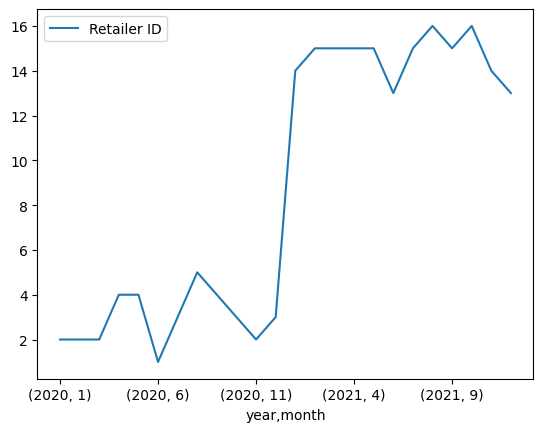

In [76]:
df.pivot_table(index = ['year', 'month'], values = 'Retailer ID', aggfunc = 'count').plot.line()

- 소매점별 월별 매장 개수 증가

In [77]:
df.pivot_table(index = ['year', 'month'], columns = 'Retailer', values = 'Retailer ID', aggfunc = 'count')

Retailer    Amazon  Foot Locker  Kohl's  Sports Direct  Walmart  West Gear
year month                                                                
2020 1         NaN          1.0     NaN            NaN      NaN        1.0
     2         NaN          1.0     NaN            NaN      NaN        1.0
     3         NaN          1.0     NaN            NaN      NaN        1.0
     4         NaN          1.0     NaN            NaN      1.0        2.0
     5         NaN          1.0     NaN            1.0      1.0        1.0
     6         NaN          NaN     NaN            NaN      NaN        1.0
     7         NaN          NaN     NaN            1.0      1.0        1.0
     8         NaN          1.0     NaN            1.0      1.0        2.0
     9         NaN          1.0     NaN            1.0      1.0        1.0
     10        NaN          1.0     NaN            1.0      1.0        NaN
     11        NaN          1.0     NaN            NaN      NaN        1.0
     12        NaN          1.0     1.0            NaN      NaN        1.0
2021 1         1.0          3.0     4.0            3.0      NaN        3.0
     2         1.0          3.0     4.0            3.0      1.0        3.0
     3         1.0          3.0     4.0            3.0      1.0        3.0
     4         1.0          2.0     4.0            3.0      2.0        3.0
     5         1.0          2.0     4.0            3.0      2.0        3.0
     6         1.0          2.0     3.0            2.0      2.0        3.0
     7         1.0          3.0     3.0            2.0      3.0        3.0
     8         1.0          3.0     3.0            3.0      3.0        3.0
     9         1.0          2.0     3.0            3.0      3.0        3.0
     10        1.0          3.0     3.0            3.0      3.0        3.0
     11        1.0          3.0     3.0            3.0      1.0        3.0
     12        1.0          3.0     3.0            2.0      1.0        3.0

### 소매점 별 월별 매장 개수 증감소 그래프

<Axes: xlabel='year,month'>

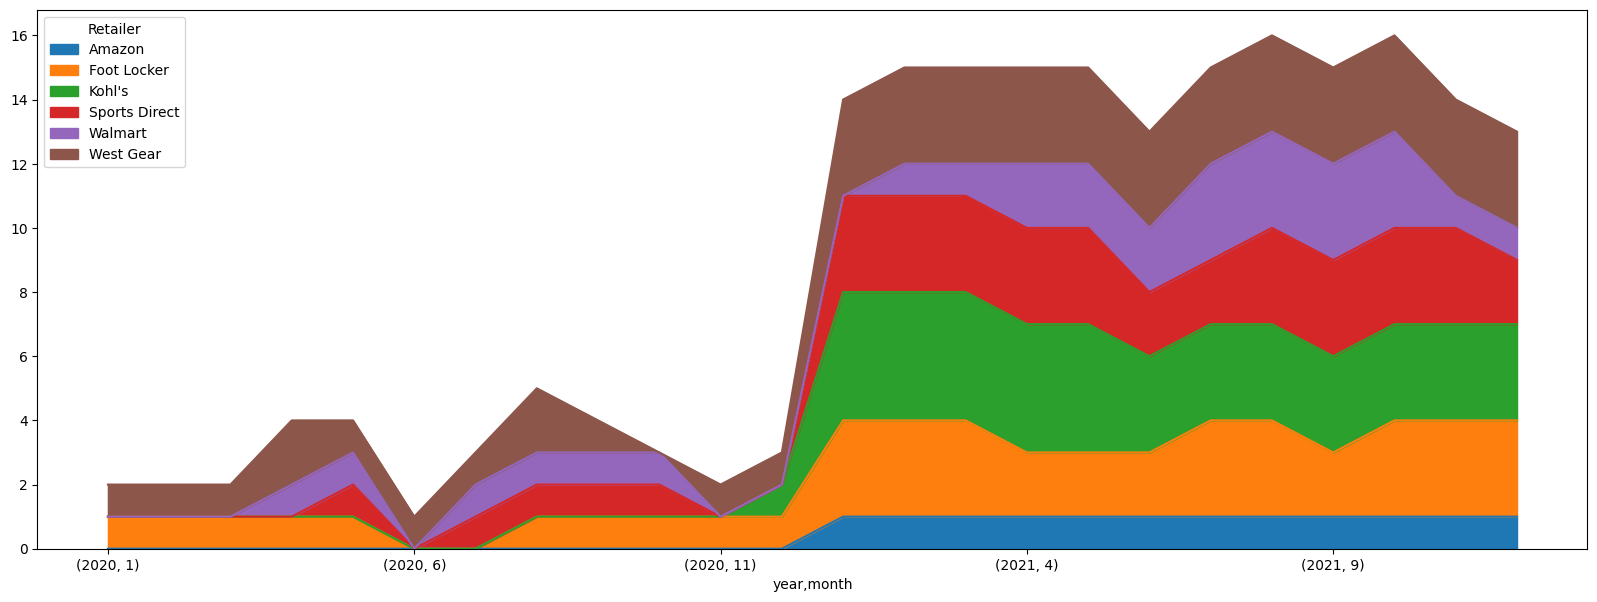

In [78]:
df.pivot_table(index = ['year', 'month'], columns = 'Retailer', values = 'Retailer ID', aggfunc = 'count').plot(kind = "area", figsize=(20,7))

# 왜 2021년도 부터 매장을 늘린걸까 ?
# 코로나 시기여서 .. ?

# 데이터 분석(2)

## 마진율 분석

In [83]:
adidas.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating Profit_rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.5,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.3,2020,1


In [82]:
adidas.groupby('year').agg({'Operating Profit_rate' : 'mean'})

# 판매량에 따른 마진율도 증가

,Operating Profit_rate
year,
2020,0.403733
2021,0.425996


<Axes: xlabel='year,month'>

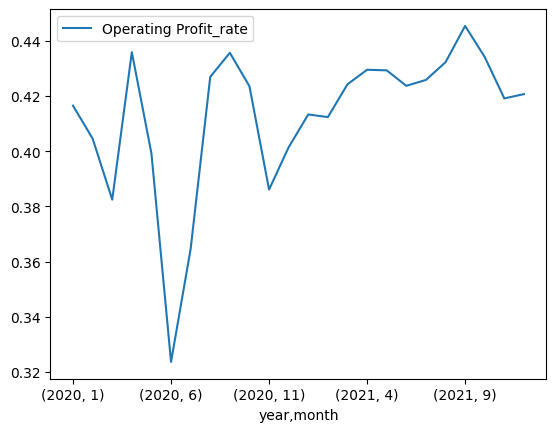

In [84]:
adidas.pivot_table(index = ['year', 'month'], values = 'Operating Profit_rate', aggfunc = 'mean').plot()

<Axes: xlabel='year,month'>

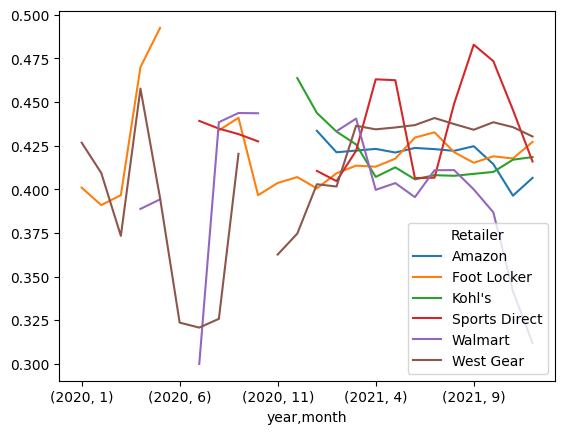

In [85]:
adidas.pivot_table(index = ['year', 'month'], columns = 'Retailer', values = 'Operating Profit_rate', aggfunc = 'mean').plot.line()

# West Gear, Walmart 두개 소매점이 마진율이 낮았다. 20년 6월에

## 판매방법에 따른 마진율/판매단가

In [87]:
adidas['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

<Axes: xlabel='year,month'>

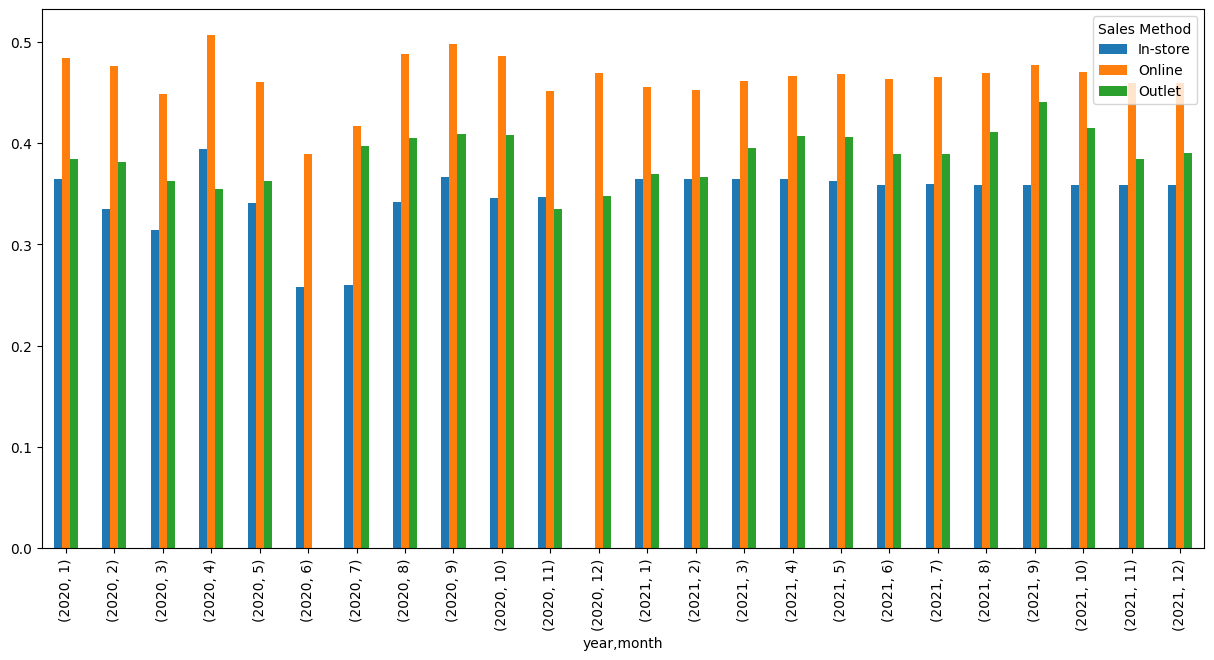

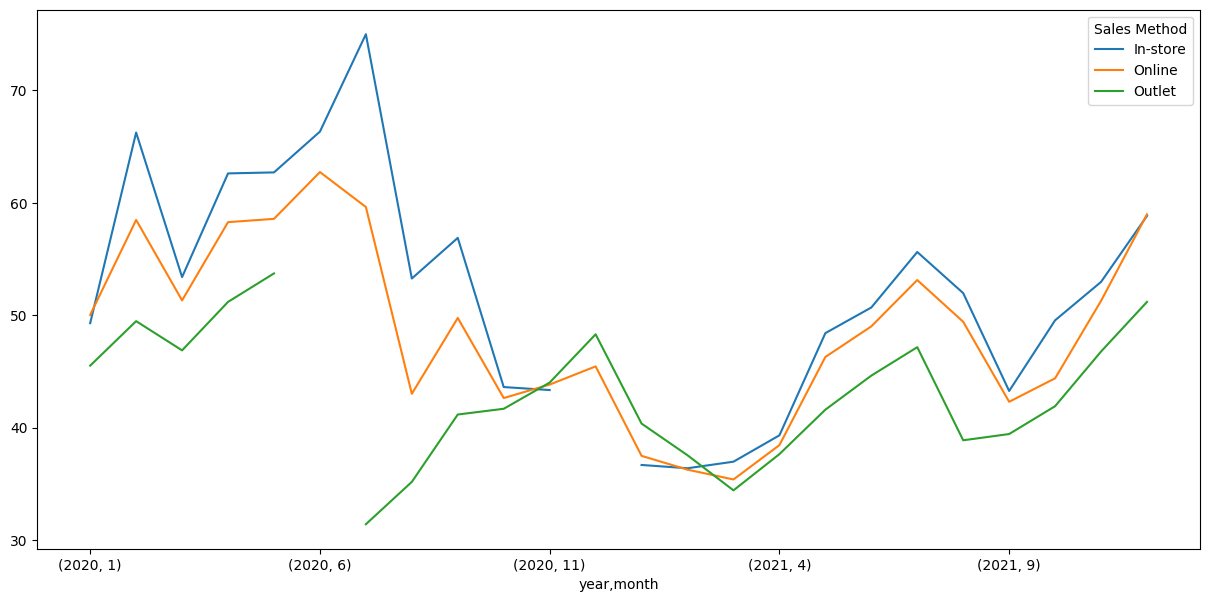

In [88]:
adidas.pivot_table(index = ['year', 'month'], columns = 'Sales Method', values = 'Operating Profit_rate', aggfunc = 'mean').plot(kind = 'bar', figsize = (15,7))

# 마진율은 온라인 > 아울렛 > 오프라인 순

adidas.pivot_table(index = ['year', 'month'], columns = 'Sales Method', values = 'Price per Unit', aggfunc = 'mean').plot(kind = 'line', figsize = (15, 7))

# 판매단가는 오프라인 > 온라인 > 아울렛 순

## 원가가 낮기때문에 마진율이 높을것이다
## 그래서 온라인이 원가가 낮다 ..?

## 판매방법에 따라 판매성과에 차이가 있을 것인가 ?

1. 일원배치 분산분석을 이용한 통계적 검증
2. 세개 이상의 집단이 하나의 변수로 인해 차이가 나는지 검증하는 분석방법
3. 최소자승법을 이용하여 검증 가능
4. boxplot을 이용한 시각화

<Axes: title={'center': 'Price per Unit'}, xlabel='[Sales Method]'>

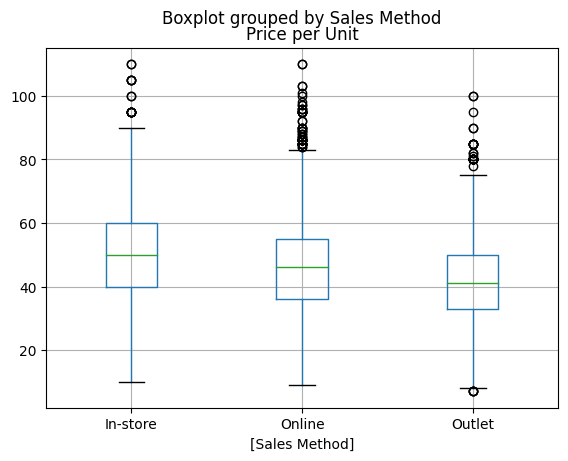

In [89]:
adidas[['Sales Method', 'Price per Unit']].boxplot(by = 'Sales Method')

# 판매방법에 따른 판매가격 이상치 검증

<Axes: title={'center': 'Operating Profit_rate'}, xlabel='[Sales Method]'>

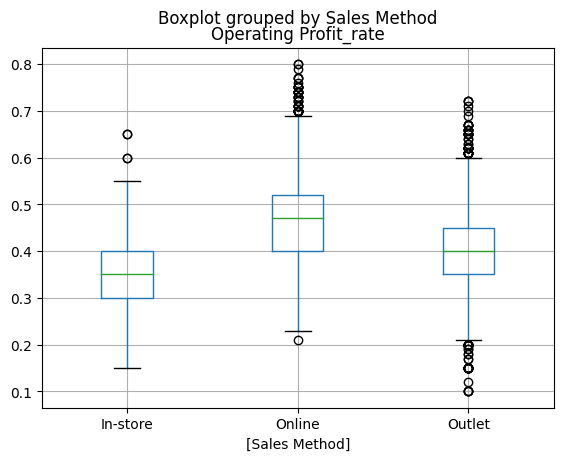

In [90]:
adidas[['Sales Method', 'Operating Profit_rate']].boxplot(by = 'Sales Method')

# 판매방법에 따른 마진율 검증

## 위에 단가랑은 다르게 오프라인이 마진율이 낮다.

### ANOVA 함수 적용

In [96]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [91]:
# x : 비교그룹(매장, 온라인, 아울렛)
# y : 비교할 변수 > 영업이익, 단가
x = 'Sales Method'
y = 'Operating Profit_rate'

In [92]:
df1 = adidas[[x,y]]
df1

,Sales Method,Operating Profit_rate
0,In-store,0.50
1,In-store,0.30
2,In-store,0.35
3,In-store,0.35
4,In-store,0.30
...,...,...
9643,Outlet,0.28
9644,Outlet,0.32
9645,Outlet,0.37
9646,Outlet,0.42


In [94]:
# 띄어쓰기 있는 경우 statemodels의 ols 함수가 인식못함
# 띄어쓰기를 _로 바꿈
x = x.replace(' ','_')
y = y.replace(' ','_')
print("바뀐이름 : ", x, ' : ', y)

바뀐이름 :  Sales_Method  :  Operating_Profit_rate


In [99]:
df1.columns = [x,y]
df1.columns

Index(['Sales_Method', 'Operating_Profit_rate'], dtype='object')

In [100]:
# 원핫인코딩광 유사

model = ols(f'{y} ~ C({x})', df1).fit()

In [101]:
anova_tb = anova_lm(model)
print(anova_tb)

# PR :  0.05 보다 작다면 기각

                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN


In [102]:
if anova_tb.iloc[0,4] < 0.05:
  print(f'판매방법에 따른 {y}가 차이가 있다')
else:
  print(f'판매방법에 따른 {y}가 차이가 없다.')

판매방법에 따른 Operating_Profit_rate가 차이가 있다


함수 정의


In [106]:
def anova_analysis(x,y):
  df1 = adidas[[x,y]]
  x = x.replace(' ','_')
  y = y.replace(' ','_')

  print("바뀐이름 : ", x, ' : ', y)

  df1.columns = [x,y]

  model = ols(f'{y} ~ C({x})', df1).fit()
  anova_tb = anova_lm(model)
  print(anova_tb)

  if anova_tb.iloc[0,4] < 0.05:
    print(f'판매방법에 따른 {y}가 차이가 있다')
  else:
    print(f'판매방법에 따른 {y}가 차이가 없다.')


In [107]:
# 판매가격의 차이 검증

anova_analysis('Sales Method', 'Price per Unit')

print('\n\n\n==========================')

# 마진율의 차이 검증
anova_analysis('Sales Method', 'Operating Profit_rate')

바뀐이름 :  Sales_Method  :  Price_per_Unit
                     df        sum_sq       mean_sq           F        PR(>F)
C(Sales_Method)     2.0  5.550261e+04  27751.304281  131.810754  3.339384e-57
Residual         9645.0  2.030649e+06    210.538999         NaN           NaN
판매방법에 따른 Price_per_Unit가 차이가 있다



바뀐이름 :  Sales_Method  :  Operating_Profit_rate
                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN
판매방법에 따른 Operating_Profit_rate가 차이가 있다


### 정리

1. 판매방법에 따라 단가 차이가 있다. 매장 > 온라인 > 아울렛 순

  1.1 즉, 매장방법 손님의 객단가가 가장 높고, 다음으로 온라인, 아울렛 순으로 높다. > 할인율이 높다는 뜻은 아님

2. 아울렛은 매장, 온라인에서 판매되지 않는 상품이 판매되기 때문에 인사이트 분석을 위한 비교대상으로 보기 어렵다.

3. 판매방법에 따라 마진율차이가 있다. 온라인 > 아울렛 > 매장 순

### 결과

1. 온라인 : 단가 낮은 상품이 많이 팔리고, 마진율은 높음

2. 매장 : 단가 높은 상품 많이 팔리고, 마진율도 낮음



# E-Commerce 데이터 분석

In [108]:
Olist = pd.read_csv('/content/drive/MyDrive/metacode_project/List of Orders.csv')
Detail = pd.read_csv('/content/drive/MyDrive/metacode_project/Order Details.csv')

In [112]:
Olist.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [113]:
Detail.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [114]:
Olist.info(), Detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


(None, None)

## 전처리

In [116]:
Olist[Olist['Order ID'].isna()]

,Order ID,Order Date,CustomerName,State,City
500,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN,NaN
506,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN
508,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN


In [118]:
Olist[Olist['Order ID'].isna()].isnull().sum()

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

In [119]:
Olist = Olist[Olist['Order ID'].isna()==False]
Olist.shape

(500, 5)

In [120]:
data = Olist.merge(Detail, on='Order ID')

# 1. 누락 데이터 확인
# 2. 중복 데이터 확인

In [122]:
data.isnull().values.any()

# 하나라도 true 값이 있다면 false가 안나옴

False

In [123]:
len(Olist['Order ID'].unique())

500

In [125]:
len(Detail['Order ID'].unique())

500

In [126]:
# 날짜 변환

data['Order Date'] = pd.to_datetime(data['Order Date'], format = "%d-%m-%Y")

In [127]:
data['Order Date'].min(), data['Order Date'].max()

(Timestamp('2018-04-01 00:00:00'), Timestamp('2019-03-31 00:00:00'))

In [128]:
data['year'] = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month
data['yearmonth'] = data['Order Date'].astype('str').str.slice(0,7)

In [129]:
data.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,year,month,yearmonth
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,2018,4,2018-04
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,2018,4,2018-04
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,2018,4,2018-04
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,2018,4,2018-04
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,2018,4,2018-04


## EDA

### Plotly 를 이용한 EDA 시각화

In [130]:
import plotly.express as px

In [131]:
ecom_df = data.groupby('yearmonth').agg({'Quantity' : 'sum'})

In [132]:
ecom_df = ecom_df.reset_index()
ecom_df

,yearmonth,Quantity
0,2018-04,389
1,2018-05,423
2,2018-06,369
3,2018-07,240
4,2018-08,446
5,2018-09,331
6,2018-10,419
7,2018-11,578
8,2018-12,412
9,2019-01,745


### Line 그래프 그리기

In [133]:
fig1 = px.line(ecom_df, x = 'yearmonth', y = 'Quantity', title = 'Sales Qunatity by month')
fig1.show()

# 판매 수량에 따른 그래프

In [134]:
ecom_df2 = data.groupby('yearmonth').agg({'Amount' : 'sum'}).reset_index()
fig2 = px.line(ecom_df2, x = 'yearmonth', y = 'Amount', title = 'Sales Amount by month')
fig2.show()

# 판매금액에 따른 그래프

### Bar 그래프 그리기

In [136]:
ecom_df3 = data.pivot_table(index = 'Category', values = ['Quantity'], aggfunc = 'sum').reset_index()
ecom_df3

,Category,Quantity
0,Clothing,3516
1,Electronics,1154
2,Furniture,945


In [137]:
fig3 = px.bar(ecom_df3, x = 'Category', y = 'Quantity')
fig3.show()

In [138]:
ecom_df4 = data.pivot_table(index = ['yearmonth','Category'], values = 'Quantity', aggfunc = 'sum').reset_index()
ecom_df4

,yearmonth,Category,Quantity
0,2018-04,Clothing,251
1,2018-04,Electronics,75
2,2018-04,Furniture,63
3,2018-05,Clothing,233
4,2018-05,Electronics,116
5,2018-05,Furniture,74
6,2018-06,Clothing,235
7,2018-06,Electronics,82
8,2018-06,Furniture,52
9,2018-07,Clothing,142


In [139]:
fig4 = px.bar(ecom_df4, x = 'yearmonth', y = 'Quantity', color = 'Category')
fig4.show()

### heat map 을 이용한 지역별 주력 판매상품 분석

In [142]:
ecom_df5 = data.pivot_table(index = ['State', 'Sub-Category'], values = ['Quantity', 'Amount', 'Profit'], aggfunc = 'sum').reset_index()
ecom_df5

,State,Sub-Category,Amount,Profit,Quantity
0,Andhra Pradesh,Accessories,231.0,22.0,2
1,Andhra Pradesh,Bookcases,4581.0,-1642.0,25
2,Andhra Pradesh,Electronic Games,188.0,-193.0,2
3,Andhra Pradesh,Furnishings,57.0,7.0,3
4,Andhra Pradesh,Hankerchief,710.0,80.0,32
...,...,...,...,...,...
272,West Bengal,Shirt,422.0,105.0,18
273,West Bengal,Skirt,17.0,8.0,2
274,West Bengal,Stole,1207.0,321.0,35
275,West Bengal,T-shirt,421.0,177.0,17


In [143]:
fig5 = px.density_heatmap(ecom_df5, x = 'State', y = 'Sub-Category', z = 'Quantity', title = "Quantity heatmap")
fig5.show()

fig6 = px.density_heatmap(ecom_df5, x = 'State', y = 'Sub-Category', z = 'Amount', title = "Amount heatmap")
fig6.show()

# z = 밀도를 어떤걸 사용할거냐


# streamlit 을 이용한 대시보드 그리기

## 코드 함수 모듈화


In [144]:
!pip install streamlit
!npm install localtunnel
!pip install "ipywidgets>=7, <8"

In [ ]:
def load_data():
  Olist = pd.read_csv('/content/drive/MyDrive/metacode_project/List of Orders.csv')
  Detail = pd.read_csv('/content/drive/MyDrive/metacode_project/Order Details.csv')

  data = Olist.merge(Detail, on='Order ID')

  return data

def preproc():
  data['Order Date'] = pd.to_datetime(data['Order Date'], format = "%d-%m-%Y")
  data['year'] = data['Order Date'].dt.year
  data['month'] = data['Order Date'].dt.month
  data['yearmonth'] = data['Order Date'].astype('str').str.slice(0,7)

  return df

def line_chart(data, x, y, title):
  df = data.groupby(x).agg({y : 'sum'}).reset_index()
  fig = px.line(df, x=x, y=y, title = title)
  fig.show()

  return fig

fig1 = line_chart(data, 'yearmonth', 'Quantity', 'Sales Qunatity by month')
fig2 = line_chart(data, 'yearmonth', 'Amount', 'Sales Amount by month')

In [ ]:
def bar_chart(data, x, y, color=None):
  if color is not None:
    index = [x, color]
  else:
    index = x

  df = data.pivot_table(index = index, values = y, aggfunc='sum').reset_index()
  fig = px.bar(df, x = x, y = y, color = color)
  fig.show()

  return fig

fig3 = bar_chart(data, 'Category', 'Quantity')
fig4 = bar_chart(data, 'yearmonth', 'Quantity', 'Category')


In [ ]:
def heatmap(data, z, title):
  df = data.pivot_table(index = ['State', 'Sub-Category'], values = ['Quantity', 'Amount', 'Profit'], aggfunc = 'sum').reset_index()
  fig = px.density_heatmap(ecom_df5, x = 'State', y = 'Sub-Category', z = z, title = title)
  fig.show()

  return fig

fig5 = heatmap(data, 'Quantity', 'Quantity heat map')
fig6 = heatmap(data, 'Amount', 'Amount heat map')

## 대시보드 구현

In [164]:
%%writefile app.py

import streamlit as st
import plotly.express as px
import pandas as pd
import numpy as np

# 데이터 로드
@st.cache_data
def load_data():
  Olist = pd.read_csv('/content/drive/MyDrive/metacode_project/List of Orders.csv')
  Detail = pd.read_csv('/content/drive/MyDrive/metacode_project/Order Details.csv')

  data = Olist.merge(Detail, on='Order ID')

  return data

# 전처리
def preproc():
  data['Order Date'] = pd.to_datetime(data['Order Date'], format = "%d-%m-%Y")
  data['year'] = data['Order Date'].dt.year
  data['month'] = data['Order Date'].dt.month
  data['yearmonth'] = data['Order Date'].astype('str').str.slice(0,7)

  return data

# line 그래프
def line_chart(data, x, y, title):
  df = data.groupby(x).agg({y : 'sum'}).reset_index()
  fig = px.line(df, x=x, y=y, title = title)
  fig.show()

  return df, fig



# bar 그래프
def bar_chart(data, x, y, color=None):
  if color is not None:
    index = [x, color]
  else:
    index = x

  df = data.pivot_table(index = index, values = y, aggfunc='sum').reset_index()
  fig = px.bar(df, x = x, y = y, color = color)
  fig.show()

  return fig



# heatmap 그래프
def heatmap(data, z, title):
  df = data.pivot_table(index = ['State', 'Sub-Category'], values = ['Quantity', 'Amount', 'Profit'], aggfunc = 'sum').reset_index()
  fig = px.density_heatmap(df, x = 'State', y = 'Sub-Category', z = z, title = title)
  fig.show()

  return fig

if __name__ == "__main__":

  st.title('E - Commerce DATA 분석')
  st.write('시각화 대시보드 만들기')

  # 데이터 로드 및 전처리
  data = load_data()
  data = preproc()

st.subheader('월별 판매량 분석')
with st.form('form', clear_on_submit = True):
  col1, col2 = st.columns(2)
  submitted1 = col1.form_submit_button('판매량 그래프')
  submitted2 = col2.form_submit_button('매출액 그래프')

  if submitted1:
    df1, fig1 = line_chart(data, 'yearmonth', 'Quantity', 'Sales Qunatity by month')
    st.dataframe(df1.T)
    st.plotly_chart(fig1, theme="streamlit", use_container_width = True)
  elif submitted2:
    df2, fig2 = line_chart(data, 'yearmonth', 'Amount', 'Sales Amount by month')
    st.dataframe(df2.T)
    st.plotly_chart(fig2, theme="streamlit", use_container_width = True)


st.subheader('품목별 판매량')
col1, col2 = st.columns(2)
with col1:
  col1.subheader("카테고리별 판매량")
  fig3 = bar_chart(data, 'Category', 'Quantity')
  st.plotly_chart(fig3, theme="streamlit", use_container_width=True)
with col2:
  col2.subheader("월별/카테고리별 누적차트")
  fig4 = bar_chart(data, 'yearmonth', 'Quantity', 'Category')
  st.plotly_chart(fig4, theme="streamlit", use_container_width=True)


st.subheader('지역별 주력 판매상품')
tab1, tab2 = st.tabs(['Quantity heat map', 'Amount heat map'])
with tab1:

  fig5 = heatmap(data, 'Quantity', 'Quantity heat map')
  st.plotly_chart(fig5, theme="streamlit", use_container_width=True)

with tab2:

  fig6 = heatmap(data, 'Amount', 'Amount heat map')
  st.plotly_chart(fig6, theme="streamlit", use_container_width=True)

Overwriting app.py


In [165]:
!streamlit run /content/app.py & npx lt --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.150.96:8501

your url is: https://moody-olives-burn.loca.lt
2024-05-13 11:33:25.568 Serialization of dataframe to Arrow table was unsuccessful due to: ("Expected bytes, got a 'int' object", 'Conversion failed for column 0 with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.
2024-05-13 11:33:30.728 Serialization of dataframe to Arrow table was unsuccessful due to: ("Expected bytes, got a 'float' object", 'Conversion failed for column 0 with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.
2024-05-13 11:33:33.835 Serialization of dataframe to Arrow table was unsuccessful due to: ("Expected bytes, got a 'int' object", 'Conversion failed for column 0 with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.
2024-05-13 11:34:1